# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key



# Build query URL
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print (query_url)

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=5ed371a2339994fb5b0ea9f791c16fb7&q=


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Create lists to store weather data points lat,lng, max temp, cloudiness, wind speed, country, and date
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


count_one = 0
set_one = 1

print("------------------------------\nData Retrieval Started\n------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])   
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")        
    except KeyError: 
        print("City not available")
        


print("------------------------------\nData Retrieval Completed\n------------------------------")    
      



------------------------------
Data Retrieval Started
------------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | tocopilla
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | ushuaia
City not available
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | moose factory
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | high level
Processing Record 11 of Set 1 | pindiga
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | sabang
Processing Record 17 of Set 1 | bilma
City not available
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | kisangani
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | gigmoto
Processing R

City not available
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | yashkul
Processing Record 45 of Set 4 | takoradi
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | berezniki
Processing Record 48 of Set 4 | peace river
Processing Record 49 of Set 4 | lompoc
Processing Record 1 of Set 5 | cabatuan
Processing Record 2 of Set 5 | manggar
Processing Record 3 of Set 5 | gawler
Processing Record 4 of Set 5 | san policarpo
City not available
Processing Record 5 of Set 5 | broken hill
Processing Record 6 of Set 5 | tongzhou
Processing Record 7 of Set 5 | manokwari
Processing Record 8 of Set 5 | krasnoselkup
Processing Record 9 of Set 5 | ust-tsilma
Processing Record 10 of Set 5 | isangel
Processing Record 11 of Set 5 | vila
Processing Record 12 of Set 5 | hasaki
Processing Record 13 of Set 5 | lantana
Processing Record 14 of Set 5 | kadiri
City not available
Processing Record 15 of Set 5 | hermanus
Processing Record 16 of Set 5 | berberati
Processing

Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | liku
Processing Record 41 of Set 8 | pasighat
Processing Record 42 of Set 8 | guerrero negro
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | kawalu
Processing Record 45 of Set 8 | pimentel
City not available
Processing Record 46 of Set 8 | altay
Processing Record 47 of Set 8 | cowra
Processing Record 48 of Set 8 | agadez
Processing Record 49 of Set 8 | katsuura
Processing Record 1 of Set 9 | sao filipe
Processing Record 2 of Set 9 | lasa
Processing Record 3 of Set 9 | sobolevo
Processing Record 4 of Set 9 | sao gabriel da cachoeira
Processing Record 5 of Set 9 | erzin
Processing Record 6 of Set 9 | brainerd
Processing Record 7 of Set 9 | north platte
Processing Record 8 of Set 9 | kaa-khem
Processing Record 9 of Set 9 | saint-augustin
Processing Record 10 of Set 9 | riyadh
Processing Record 11 of Set 9 | sangre grande
Processing Record 12 of Set 9 | samarai
Processing Record 13 of Set 9 |

Processing Record 36 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 12 | kapoeta
Processing Record 38 of Set 12 | hamada
Processing Record 39 of Set 12 | kembe
Processing Record 40 of Set 12 | launceston
Processing Record 41 of Set 12 | ilo
Processing Record 42 of Set 12 | were ilu
City not available
Processing Record 43 of Set 12 | gizo
Processing Record 44 of Set 12 | nacala
Processing Record 45 of Set 12 | marzuq
Processing Record 46 of Set 12 | sisimiut
Processing Record 47 of Set 12 | kelo
Processing Record 48 of Set 12 | esna
City not available
Processing Record 49 of Set 12 | cayenne
City not available
Processing Record 1 of Set 13 | eureka
Processing Record 2 of Set 13 | san ramon
Processing Record 3 of Set 13 | dom pedrito
Processing Record 4 of Set 13 | grand gaube
Processing Record 5 of Set 13 | mandalgovi
Processing Record 6 of Set 13 | thaba nchu
Processing Record 7 of Set 13 | vilyuysk
Processing Record 8 of Set 13 | san pedro
Processing Record 9 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#create a dictionary for pandas to make into a dataframe 
weather = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date    
}

weather_df = pd.DataFrame(weather)


weather_df.to_csv(output_data_file)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,16.01,51,75,2.57,GL,1627409244
1,tocopilla,-22.0920,-70.1979,18.61,63,9,4.06,CL,1627409608
2,chokurdakh,70.6333,147.9167,1.64,86,100,4.96,RU,1627409608
3,bandarbeyla,9.4942,50.8122,26.08,73,98,12.18,SO,1627409347
4,ushuaia,-54.8000,-68.3000,2.81,87,90,2.06,AR,1627409577


In [15]:
agg_weather_df=weather_df.agg(['mean', 'max', 'median', 'var', 'std', 'sem'])
agg_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
max,zyryanka,78.218600,179.316700,45.380000,100.000000,100.000000,12.480000,ZW,1.627410e+09
mean,NaN,19.885607,22.169580,21.818660,68.695142,55.788945,3.657487,NaN,1.627410e+09
median,NaN,24.800000,22.747400,22.790000,73.000000,64.000000,3.090000,NaN,1.627410e+09
var,NaN,1080.102525,7945.906972,66.404309,461.400194,1407.589609,6.095751,NaN,2.971928e+04
std,NaN,32.864913,89.139817,8.148884,21.480228,37.517857,2.468957,NaN,1.723928e+02
sem,NaN,1.345071,3.648250,0.333512,0.879127,1.535504,0.101048,NaN,7.055567e+00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#Max humity is 100% 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

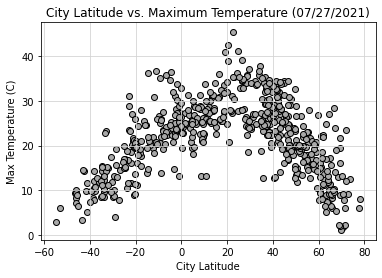

In [24]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="darkgray")
plt.title("City Latitude vs. Maximum Temperature (07/27/2021)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure1.png")
plt.show()

## Latitude vs. Humidity Plot

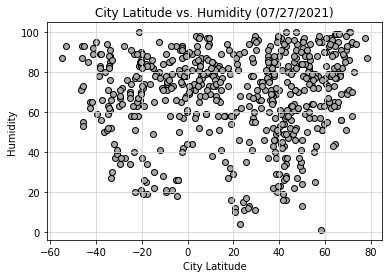

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="darkgray")
plt.title("City Latitude vs. Humidity (07/27/2021)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure2.png")
plt.show()

# Latitude vs. Cloudiness Plot

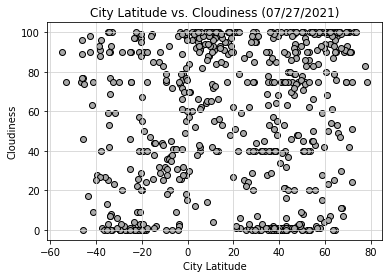

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="darkgray")
plt.title("City Latitude vs. Cloudiness (07/27/2021)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure3.png")
plt.show()

## Latitude vs. Wind Speed Plot

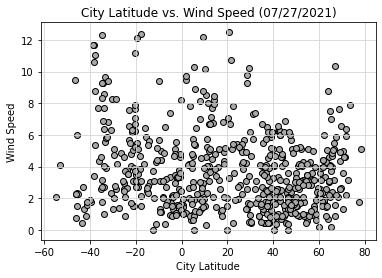

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="darkgray")
plt.title("City Latitude vs. Wind Speed (07/27/2021)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure4.png")
plt.show()

## Linear Regression

In [43]:
north= weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
south = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]
north

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,16.01,51,75,2.57,GL,1627409244
2,chokurdakh,70.6333,147.9167,1.64,86,100,4.96,RU,1627409608
3,bandarbeyla,9.4942,50.8122,26.08,73,98,12.18,SO,1627409347
5,upernavik,72.7868,-56.1549,9.16,80,100,3.13,GL,1627409609
6,moose factory,51.2585,-80.6094,18.99,59,75,2.57,CA,1627409609
...,...,...,...,...,...,...,...,...,...
589,san ramon,37.7799,-121.9780,29.07,46,1,0.45,US,1627409557
592,mandalgovi,45.7625,106.2708,18.02,63,98,3.08,MN,1627409757
594,vilyuysk,63.7553,121.6247,14.25,63,79,1.48,RU,1627409758
595,san pedro,14.3500,121.0167,27.86,89,99,8.45,PH,1627409397


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.5923847102687649


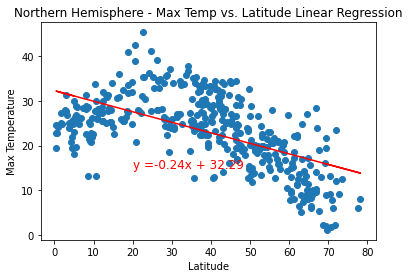

In [51]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7851440881769509


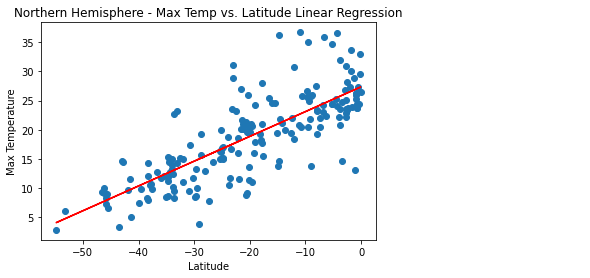

In [52]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05311793175460842


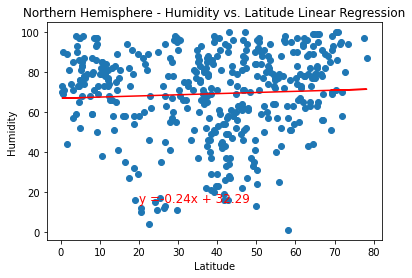

In [53]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05250337439172012


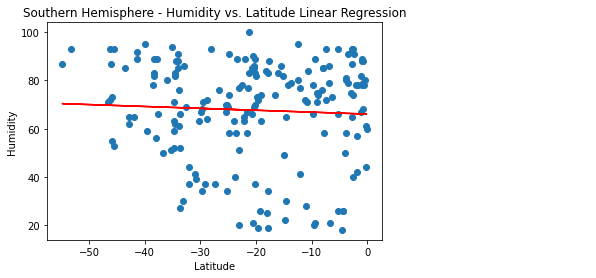

In [54]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08026291048231969


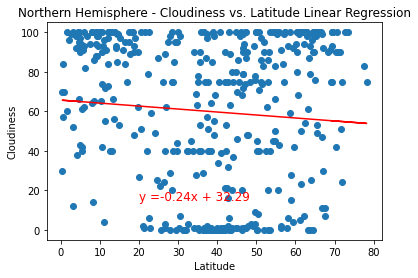

In [55]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.025540885217908715


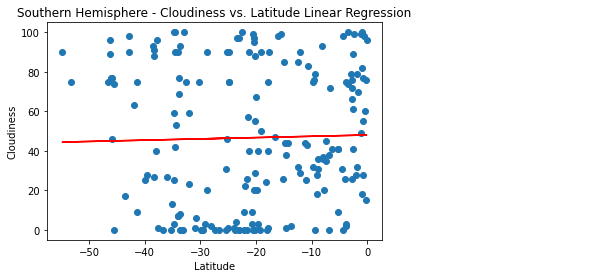

In [56]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.13536252944300867


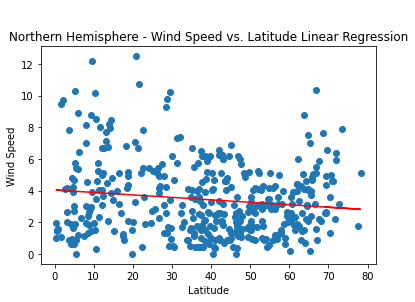

In [57]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23785473956092218


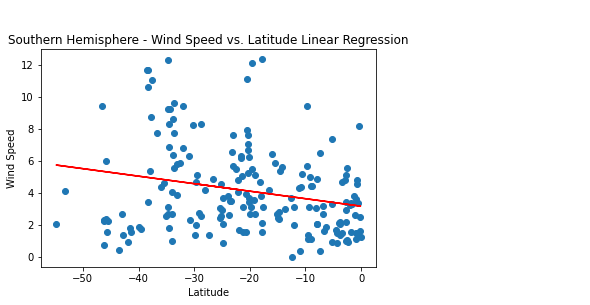

In [58]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("Figure12.png")
plt.show()